In [18]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

NameError: name 'fig' is not defined

In [8]:
df = pd.read_csv("LakeData.csv", low_memory = False)

In [9]:
', '.join(list(df.columns))

'Lake Name, Site type, ID #, Date, Time, PW, W, TotalDepth(m), SecchiDepth, Depth(m), Epi/Hypo, WaterTemp(CelS), DO(% sat), DO(mg/l), pH, Con (mS/cm), MC ID, AC ID, Nutrient ID, Layer, AT (°C), Bar P (mbar), Alt (m), Max WS (m/h), Avg WS (m/h), Wind Direction, Chloro 1 Fluorosense, Chloro  2 Fluorosense, Phyco 1  Fluorosense, Phyco 2 Fluorosense, MC (ppb), NH3, Cl, SO4, NO2, NO3, SiO2, SRP, TP, TKN, TN, COND, SS, F, Notes, Quanta #, Weather Meter #, Fluorometer #, Aquafluor #, Van Dorn #, Unnamed: 50, Unnamed: 51'

In [10]:
clean_df = clean_columns(df)
c_df = clean_df.drop(['site_type','mc_id', 'ac_id', 'pw', 'w', 'epi_hypo', 'notes'], axis = 1).dropna(how = "all")
c_df.head()

52 column names have been cleaned

,lake_name,id_#,date,time,total_depth_m,secchi_depth,depth_m,water_temp_cel_s,do_%_sat,do_mg_l,...,cond,ss,f,quanta_#,weather_meter_#,fluorometer_#,aquafluor_#,van_dorn_#,unnamed_50,unnamed_51
0,Beaver Dam,21221BEA2,8/9/2021,15:40,18.5,2.5,0.0,26.90,113.4,9.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beaver Dam,18190BEA2,7/9/2018,15:00,18.0,3.0,0.0,28.83,115.0,8.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Beaver Dam,18204BEA2,7/23/2018,15:15,19.0,5.8,0.0,25.21,88.7,7.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Beaver Dam,18211BEA2,7/31/2018,15:00,18.6,4.4,0.0,25.10,103.3,8.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beaver Dam,18218BEA2,8/6/2018,14:45,18.8,4.4,0.0,28.77,120.2,9.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
', '.join(list(clean_df.columns))

'lake_name, site_type, id_#, date, time, pw, w, total_depth_m, secchi_depth, depth_m, epi_hypo, water_temp_cel_s, do_%_sat, do_mg_l, p_h, con_m_s_cm, mc_id, ac_id, nutrient_id, layer, at_c, bar_p_mbar, alt_m, max_ws_m_h, avg_ws_m_h, wind_direction, chloro_1_fluorosense, chloro_2_fluorosense, phyco_1_fluorosense, phyco_2_fluorosense, mc_ppb, nh_3, cl, so_4, no_2, no_3, si_o_2, srp, tp, tkn, tn, cond, ss, f, notes, quanta_#, weather_meter_#, fluorometer_#, aquafluor_#, van_dorn_#, unnamed_50, unnamed_51'

NameError: name 'pylab' is not defined

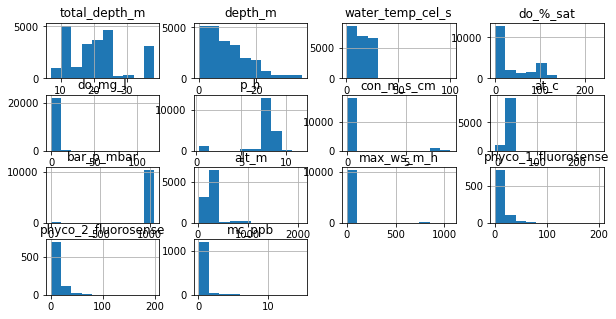

In [25]:
viz = c_df[["total_depth_m", "secchi_depth", "depth_m", "water_temp_cel_s", "do_%_sat", "do_mg_l", "p_h", "con_m_s_cm", "at_c", "bar_p_mbar", "alt_m", "max_ws_m_h", "avg_ws_m_h", "chloro_1_fluorosense", "chloro_2_fluorosense", "phyco_1_fluorosense", "phyco_2_fluorosense", "mc_ppb"]]
viz.hist()
fig = pylab.figure(figsize=(18,30))
plt.show()

In [15]:
pdf = c_df[["lake_name", "date", "do_mg_l", "mc_ppb", "water_temp_cel_s", "p_h"]].dropna()
pdf.head(5)

,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,Beaver Dam,7/9/2018,8.75,0.075,28.83,8.84
2,Beaver Dam,7/23/2018,7.27,0.075,25.21,9.13
3,Beaver Dam,7/31/2018,8.55,0.075,25.10,8.42
4,Beaver Dam,8/6/2018,9.30,0.075,28.77,8.53
5,Beaver Dam,6/1/2020,13.83,0.075,22.40,9.14


Note to self - in the cells below I dropped rows that are NA for N03 in order to create a model.

In [9]:
df = df.dropna(subset=['no_3'])
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [10]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_3']])
train_y = np.asanyarray(train[['mc_ppb']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.20661596]]
Intercept:  [0.53456029]


Text(0, 0.5, 'MC (ppb)')

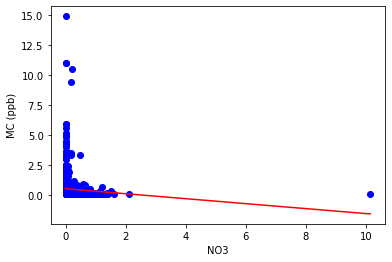

In [12]:
plt.scatter(train.no_3, train.mc_ppb,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("NO3")
plt.ylabel("MC (ppb)")